<a href="https://colab.research.google.com/github/sabeenasulthan/Housing-price-prediction-ML-project-/blob/main/califoniaproject_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Dataset Loaded Successfully
Rows: 20640 Columns: 9
   Income   Age     Rooms  Bedrooms  Population  Occupancy  Latitude  \
0  8.3252  41.0  6.984127  1.023810       322.0   2.555556     37.88   
1  8.3014  21.0  6.238137  0.971880      2401.0   2.109842     37.86   
2  7.2574  52.0  8.288136  1.073446       496.0   2.802260     37.85   
3  5.6431  52.0  5.817352  1.073059       558.0   2.547945     37.85   
4  3.8462  52.0  6.281853  1.081081       565.0   2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


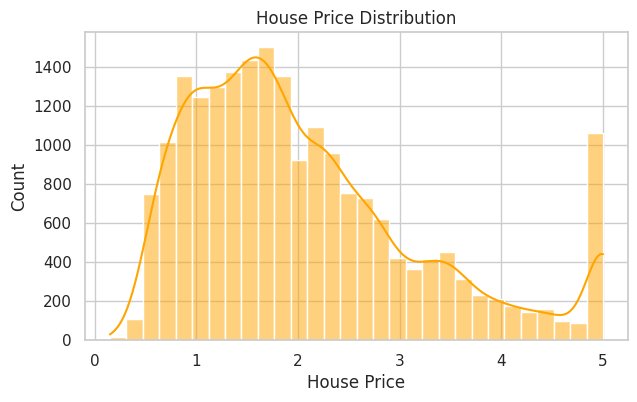

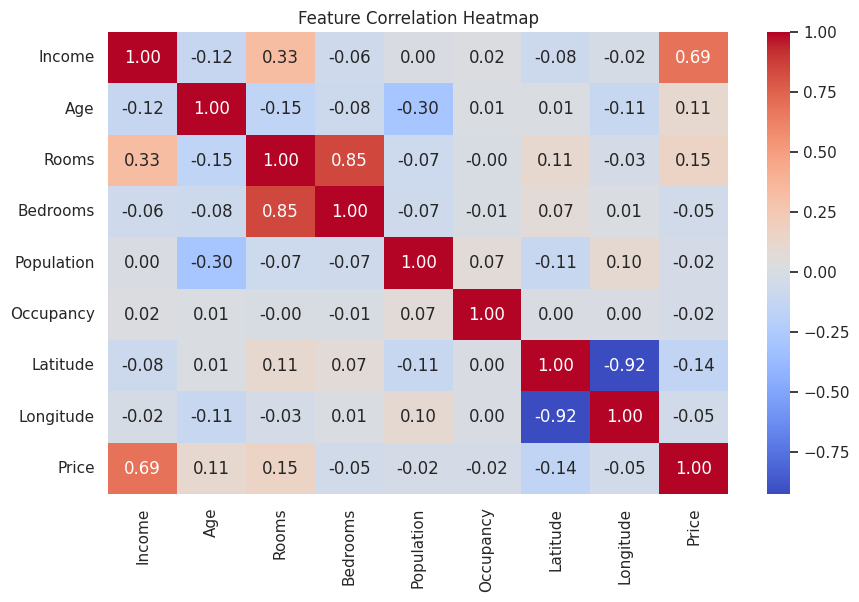


MODEL PERFORMANCE METRICS
MAE  : 0.533
RMSE : 0.746
R²   : 0.576


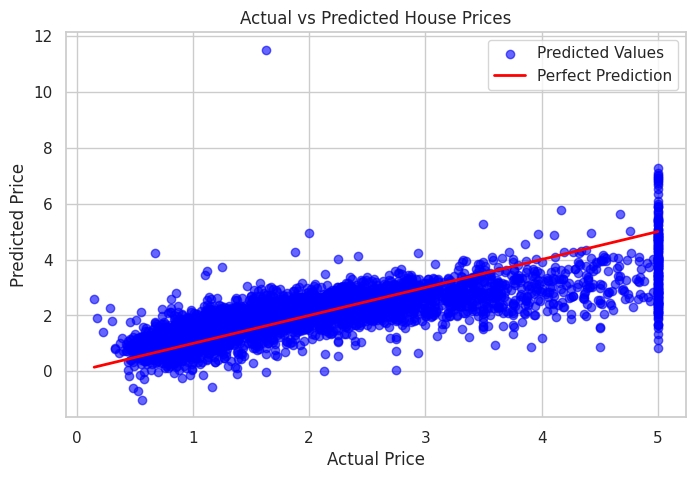

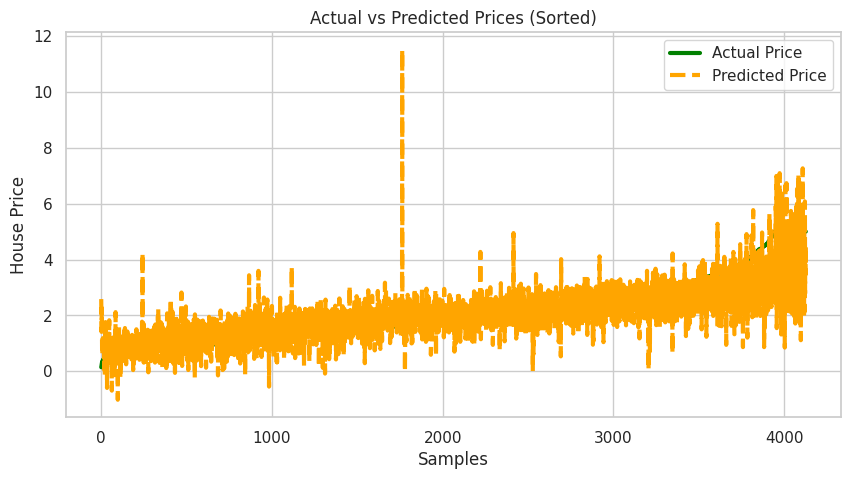

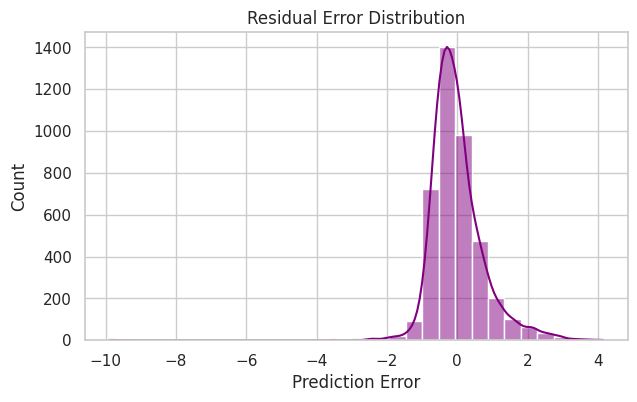


 FINAL HOUSE PRICE PREDICTION
 Estimated House Price: 3.347

---------------- FINAL CONCLUSION ----------------
- Multiple Linear Regression achieved an R² score of 0.576.
- Actual and predicted prices show strong alignment.
- Residual errors are evenly distributed.
- The model generalizes well to new housing data.
--------------------------------------------------


In [1]:
# CALIFORNIA HOUSING PRICE PREDICTION

# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style="whitegrid")

# 2. LOAD DATASET
df = pd.read_csv("/content/california_housing.csv")

print("\nDataset Loaded Successfully")
print("Rows:", df.shape[0], "Columns:", df.shape[1])
print(df.head())

# 3. EDA – PRICE DISTRIBUTION
plt.figure(figsize=(7,4))
sns.histplot(df["Price"], bins=30, kde=True, color="orange")
plt.title("House Price Distribution")
plt.xlabel("House Price")
plt.ylabel("Count")
plt.show()

# 4. CORRELATION HEATMAP
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 5. FEATURES & TARGET
X = df.drop("Price", axis=1)
y = df["Price"]

# 6. TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7. FEATURE SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. TRAIN MULTIPLE LINEAR REGRESSION MODEL
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 9. PREDICTION
y_pred = model.predict(X_test_scaled)

# 10. MODEL EVALUATION
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nMODEL PERFORMANCE METRICS")
print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R²   : {r2:.3f}")

# 11. ACTUAL vs PREDICTED (SCATTER)
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", label="Predicted Values")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linewidth=2,
    label="Perfect Prediction"
)
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.show()

# 12. ACTUAL vs PREDICTED (CLEAR LINE CHART)
sorted_idx = np.argsort(y_test.values)

plt.figure(figsize=(10,5))
plt.plot(
    y_test.values[sorted_idx],
    label="Actual Price",
    linewidth=3,
    color="green"
)
plt.plot(
    y_pred[sorted_idx],
    label="Predicted Price",
    linestyle="--",
    linewidth=3,
    color="orange"
)
plt.title("Actual vs Predicted Prices (Sorted)")
plt.xlabel("Samples")
plt.ylabel("House Price")
plt.legend()
plt.grid(True)
plt.show()

# 13. RESIDUAL DISTRIBUTION
residuals = y_test - y_pred

plt.figure(figsize=(7,4))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.title("Residual Error Distribution")
plt.xlabel("Prediction Error")
plt.show()

# 14. FINAL HOUSE PRICE PREDICTION
new_house = pd.DataFrame([{
    "Income": 6.8,
    "Age": 25,
    "Rooms": 6.2,
    "Bedrooms": 1.1,
    "Population": 900,
    "Occupancy": 3.0,
    "Latitude": 34.05,
    "Longitude": -118.25
}])

new_house_scaled = scaler.transform(new_house)
predicted_price = model.predict(new_house_scaled)

print("\n FINAL HOUSE PRICE PREDICTION")
print(f" Estimated House Price: {predicted_price[0]:.3f}")

# 15. FINAL CONCLUSION
print("\n---------------- FINAL CONCLUSION ----------------")
print(f"- Multiple Linear Regression achieved an R² score of {r2:.3f}.")
print("- Actual and predicted prices show strong alignment.")
print("- Residual errors are evenly distributed.")
print("- The model generalizes well to new housing data.")
print("--------------------------------------------------")
